Student Performance Indicator
1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


In [5]:
df= pd.read_csv('stud.csv')

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.shape

(1000, 8)

In [8]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [12]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [15]:
print("categories in 'gender' varaible:  ",df['gender'].unique())
print

categories in 'gender' varaible:   ['female' 'male']


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [16]:
print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [17]:
#define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features),numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features),categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [18]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [27]:
reading_full= df[df['reading_score']==100]['average'].count()
print('Number of students with full marks in Reading: ',reading_full)
writing_full = df[df['writing_score'] == 100]['average'].count()
print(f'Number of students with full marks in Writing: {writing_full}')
math_full = df[df['math_score'] == 100]['average'].count()
print(f'Number of students with full marks in Maths: {math_full}')



Number of students with full marks in Reading:  17
Number of students with full marks in Writing: 14
Number of students with full marks in Maths: 7


In [28]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


Exploring Data

<Axes: xlabel='average', ylabel='Count'>

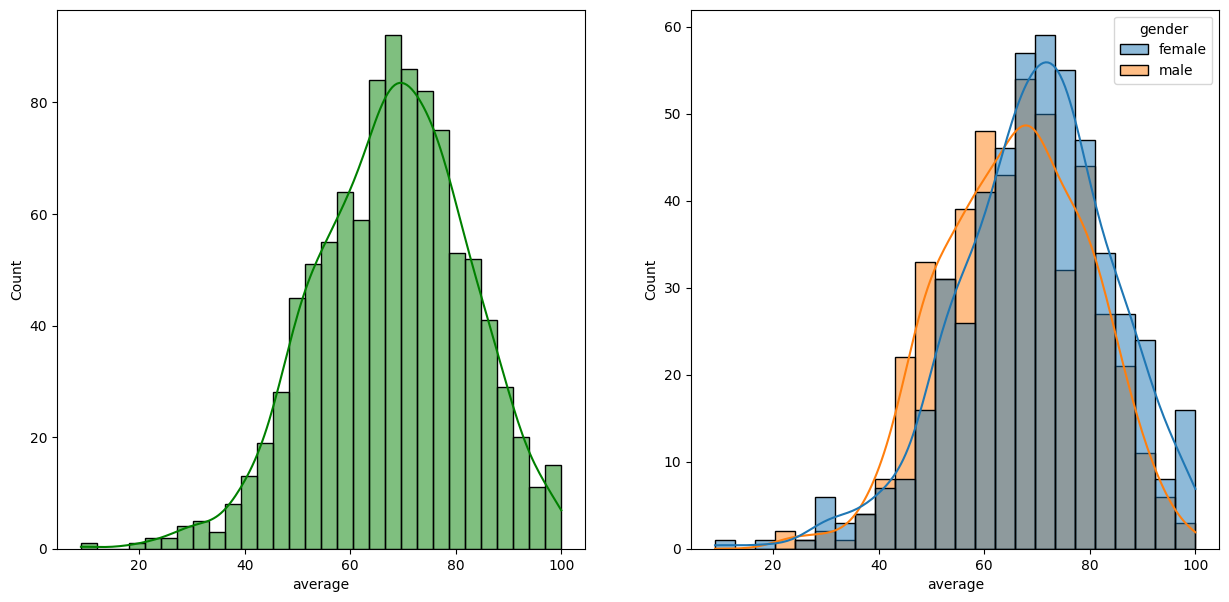

In [31]:
fig,axis = plt.subplots(1,2, figsize=(15,7))
sns.histplot(data=df,x='average', bins=30,kde=True,color='g',ax=axis[0])
sns.histplot(data=df,x='average',hue='gender',kde= True, ax= axis[1])

<Axes: xlabel='total score', ylabel='Count'>

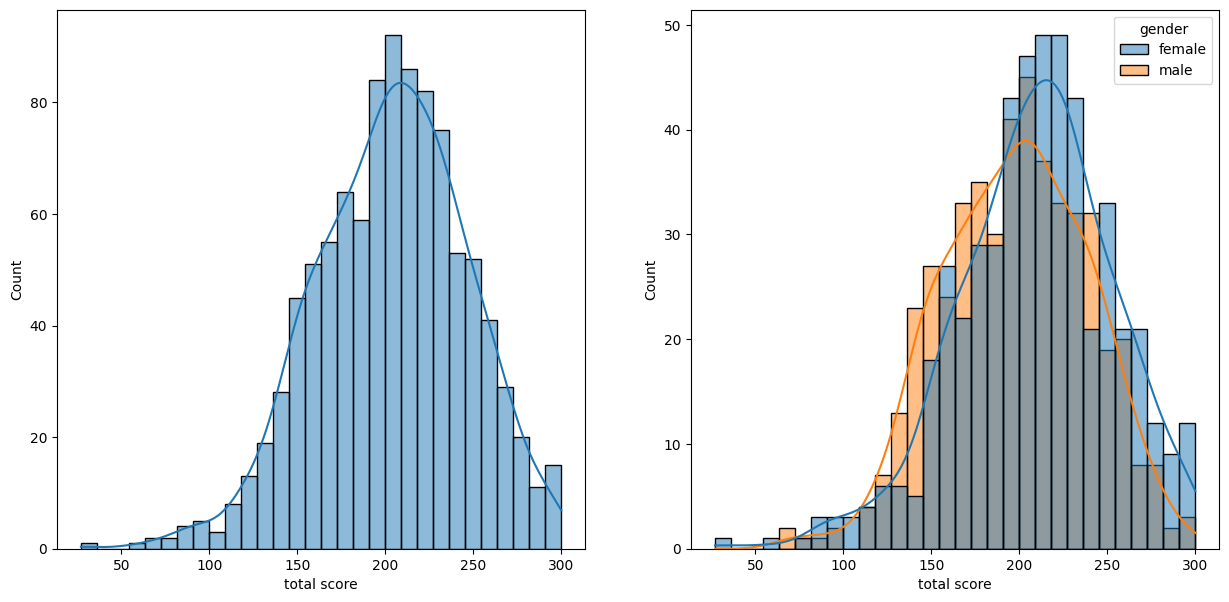

In [33]:
fig,axis= plt.subplots(1,2,figsize=(15,7))
sns.histplot(data=df,x='total score',bins=30,kde= True,ax= axis[0])
sns.histplot(data=df,x='total score',bins=30,hue='gender',kde= True,ax=axis[1])

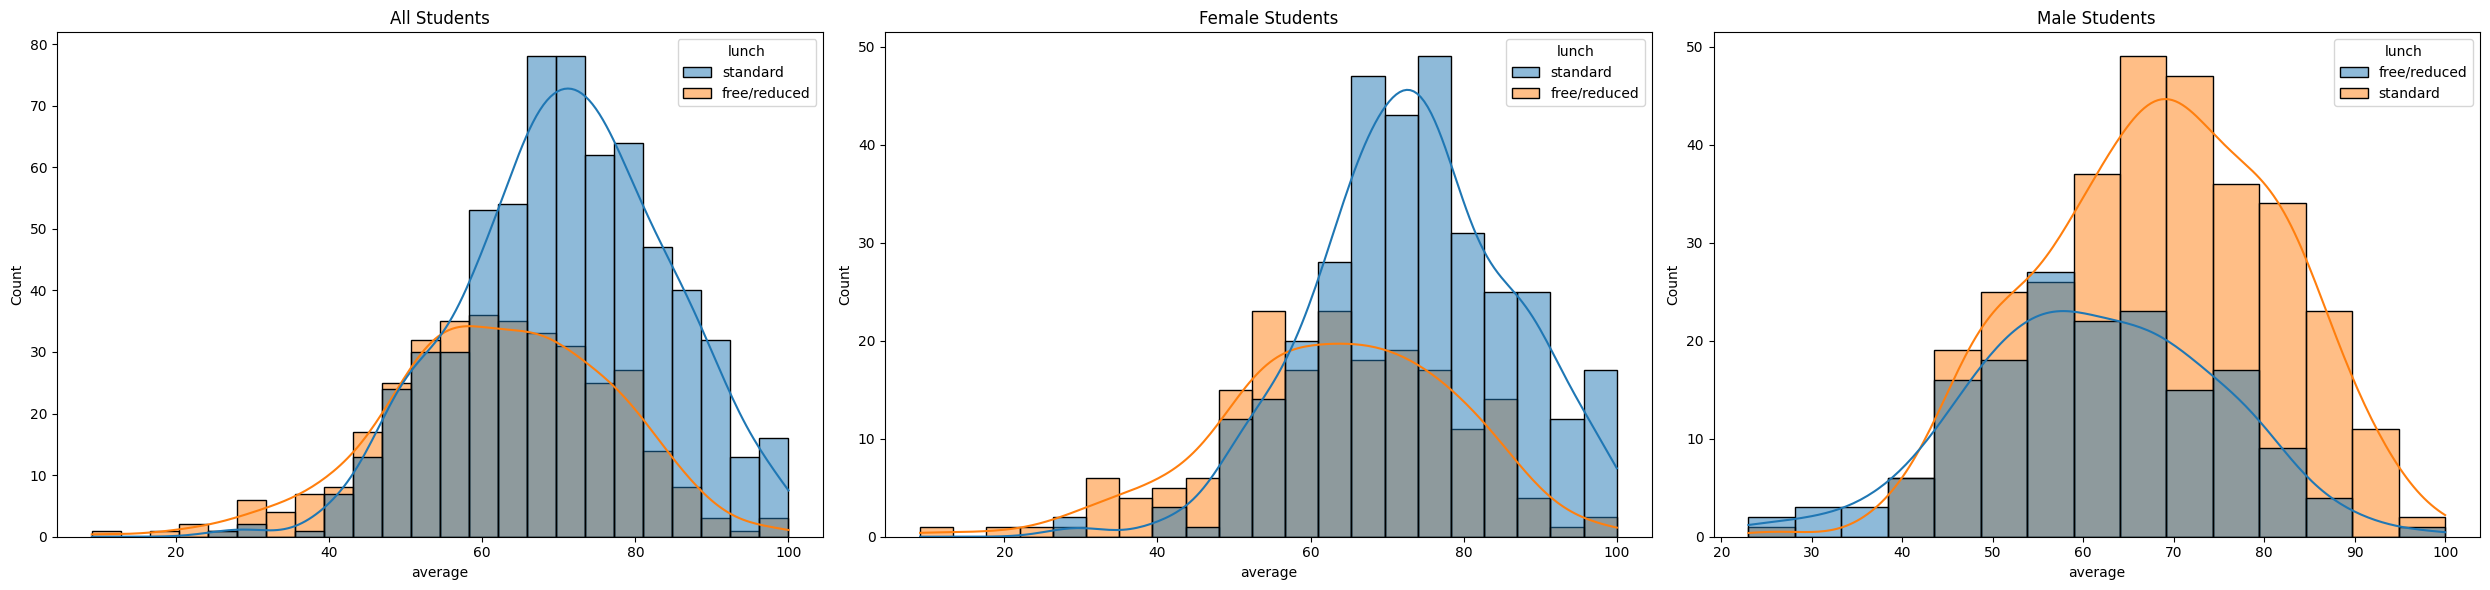

In [41]:
fig, axis = plt.subplots(1, 3, figsize=(25, 6))

sns.histplot(data=df, x='average', kde=True, hue='lunch', ax=axis[0])
axis[0].set_title('All Students')

# Plot for female students
sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='lunch', ax=axis[1])
axis[1].set_title('Female Students')

# Plot for male students
sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='lunch', ax=axis[2])
axis[2].set_title('Male Students')

plt.tight_layout()


Insights
Standard lunch helps perform well in exams.
Standard lunch helps perform well in exams for both male or a female.

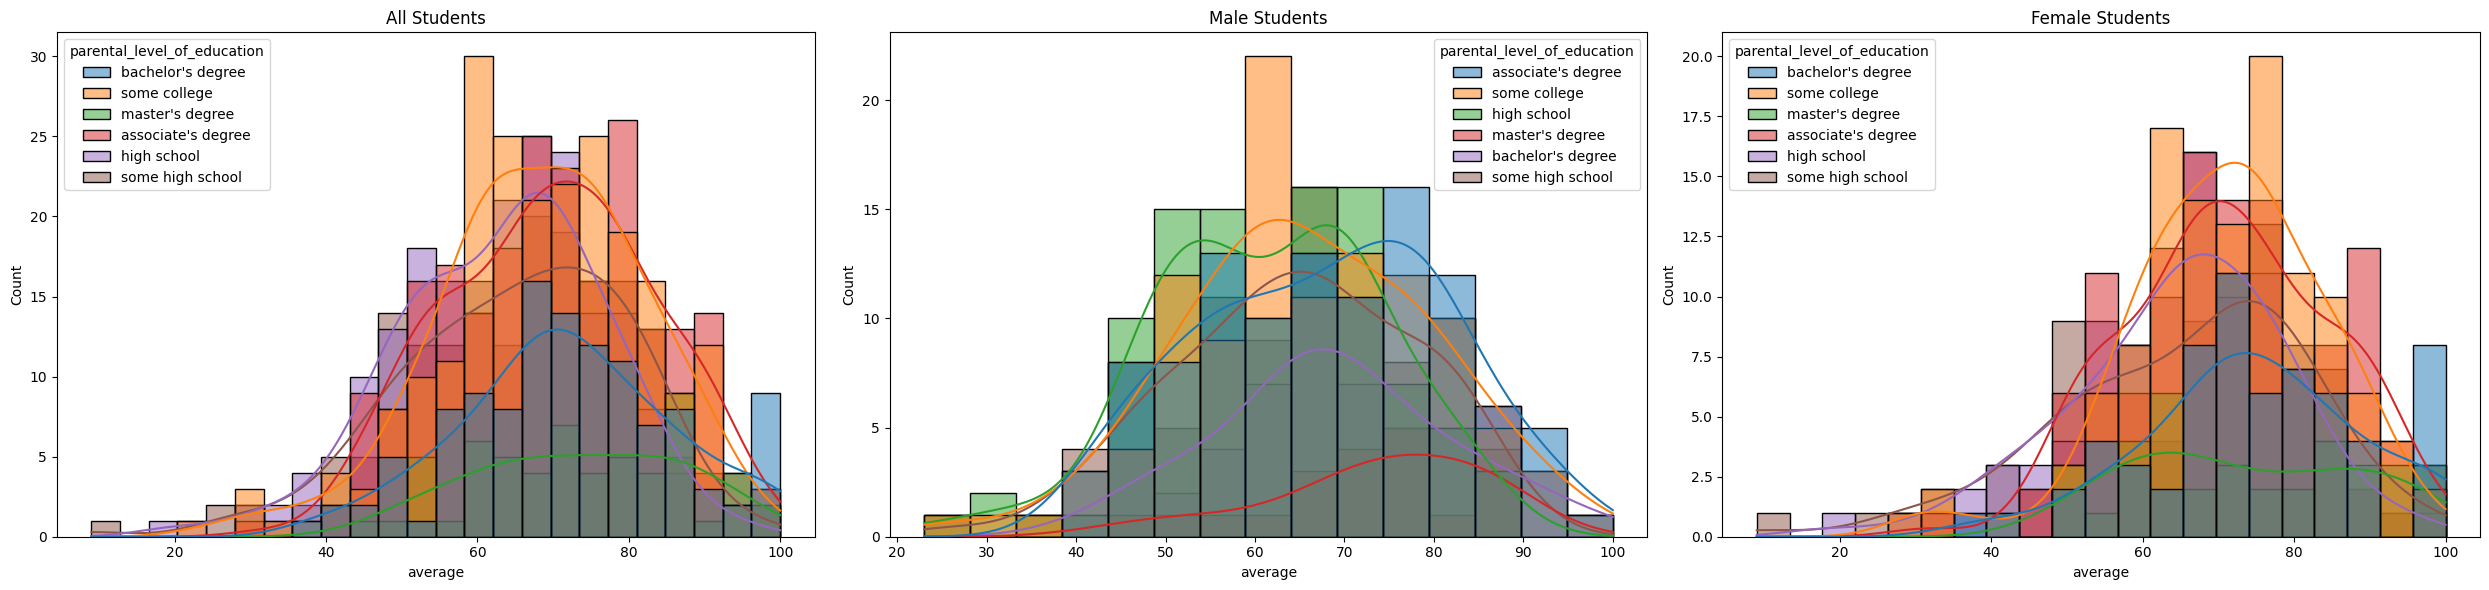

In [48]:
fig,axis= plt.subplots(1,3,figsize=(25,6))
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education',ax=axis[0])
axis[0].set_title('All Students')
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education',ax=axis[1])
axis[1].set_title('Male Students')
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education',ax=axis[2])
axis[2].set_title('Female Students')
plt.tight_layout()
 

Insights
In general parent's education don't help student perform well in exam.
2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
3rd plot we can see there is no effect of parent's education on female students

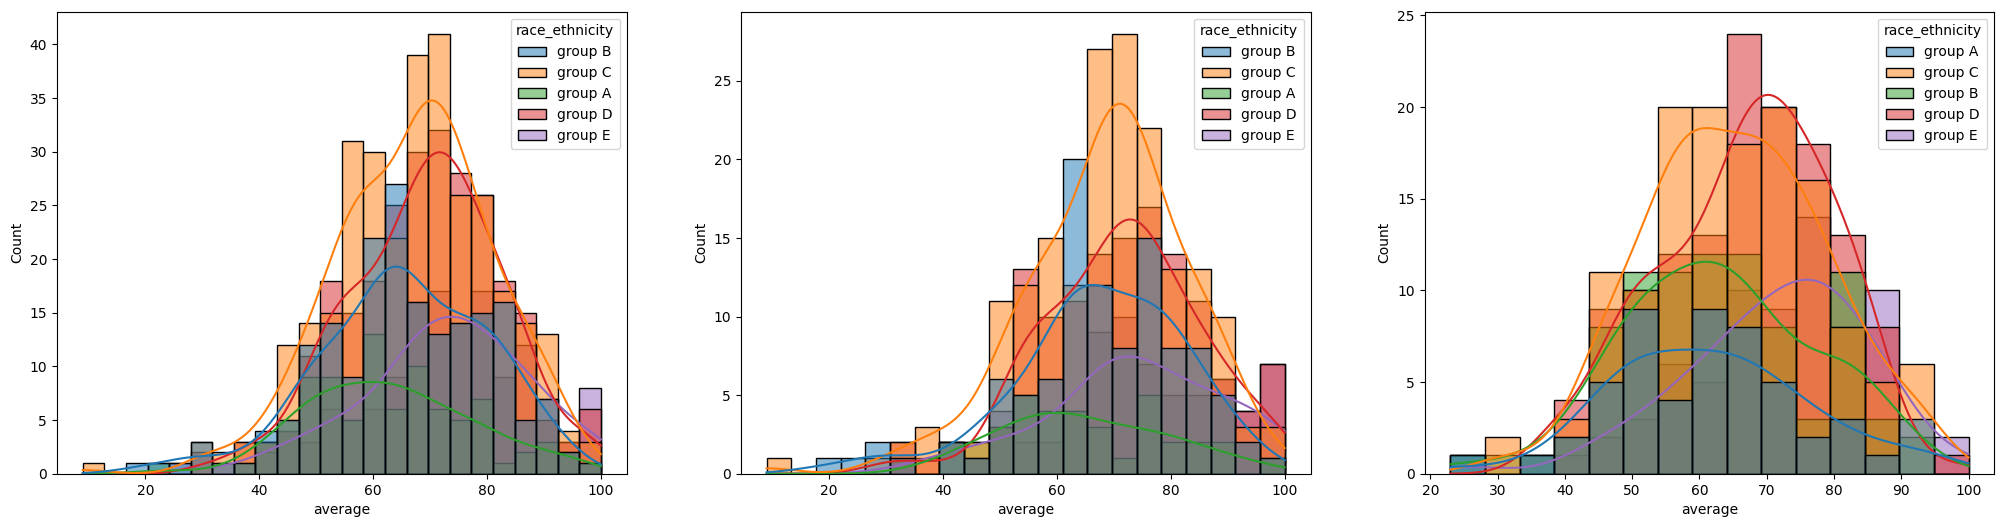

In [54]:
fig,axis= plt.subplots(1,3,figsize=(25,6))
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity',ax= axis[0])
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity',ax=axis[1])
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity',ax=axis[2])
plt.show()

Insights
Students of group A and group B tends to perform poorly in exam.
Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

Maximumum score of students in all three subjects

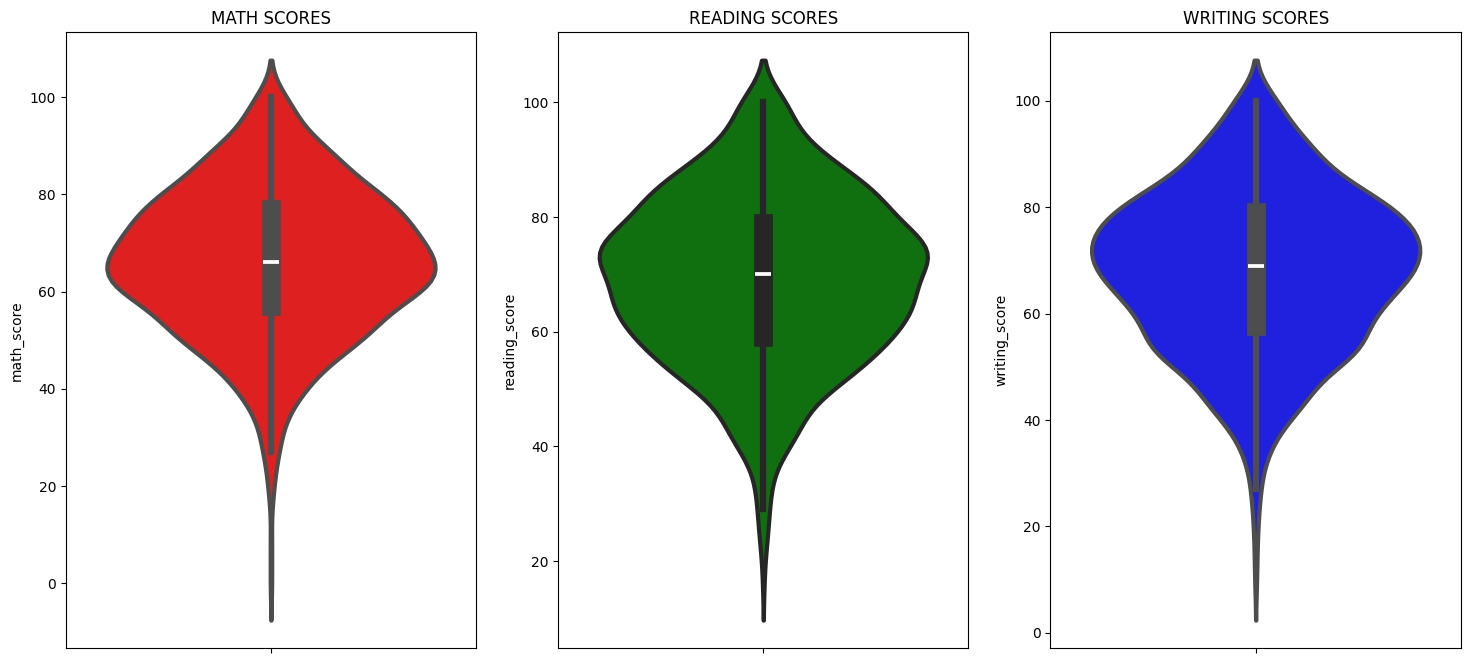

In [56]:
fig,axis= plt.subplots(1,3, figsize=(18,8))
axis[0].set_title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3,ax=axis[0])
axis[1].set_title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3,ax=axis[1])
axis[2].set_title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3,ax=axis[2])
plt.show()

Insights
From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

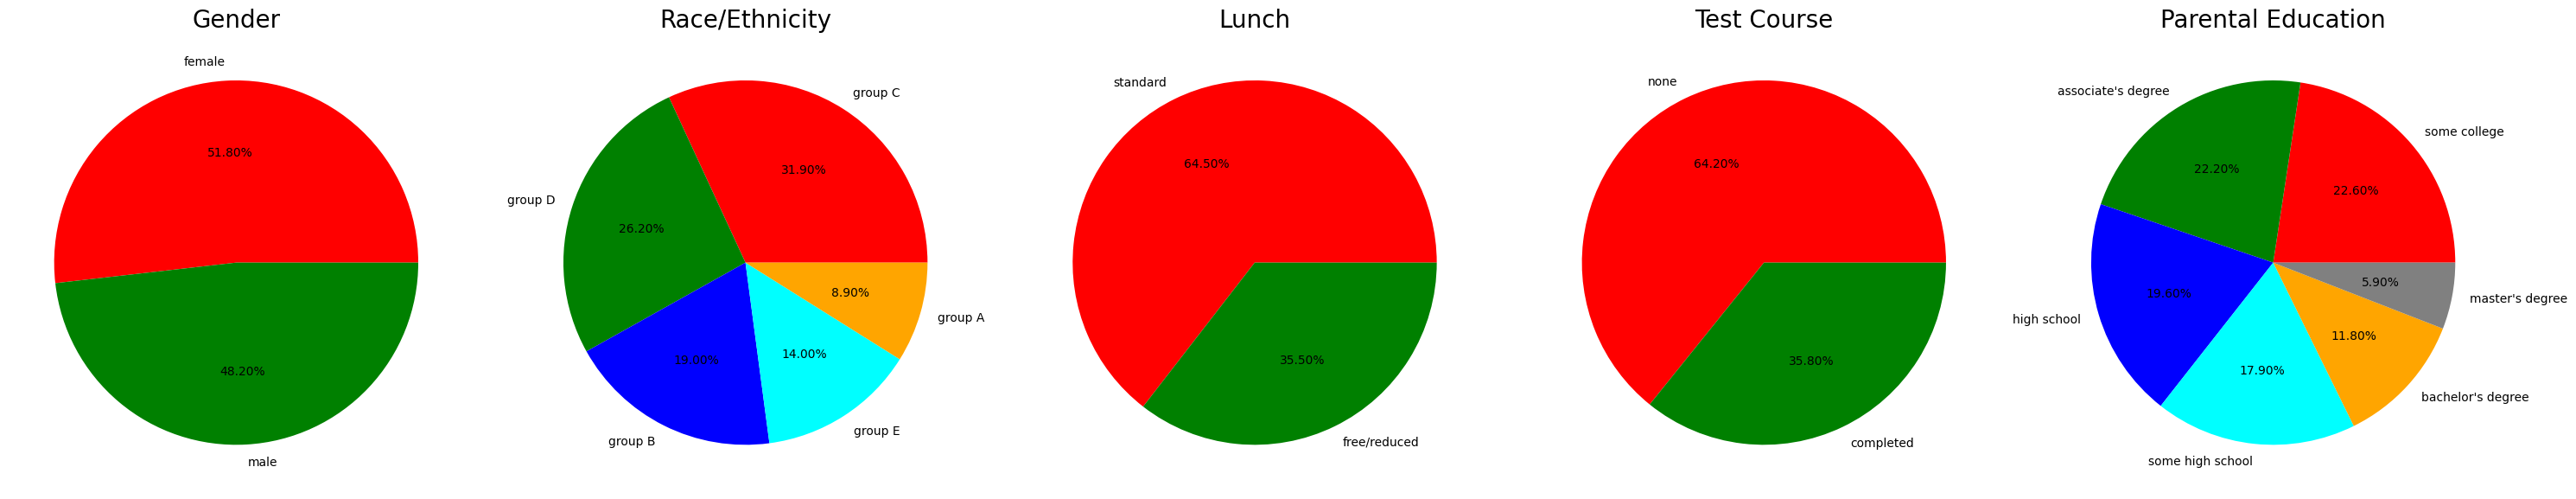

In [59]:
plt.rcParams['figure.figsize'] = (30,12)
fig, axs = plt.subplots(1, 5)
size=df['gender'].value_counts()
axs[0].pie(size,colors=['red','green'],labels=size.index,autopct='%.2f%%')
axs[0].set_title('Gender',fontsize=20)
axs[0].axis('off')
# --- Pie 2: Race/Ethnicity ---
size = df['race_ethnicity'].value_counts()
axs[1].pie(size, colors=['red', 'green', 'blue', 'cyan', 'orange'], labels=size.index, autopct='%.2f%%')
axs[1].set_title('Race/Ethnicity', fontsize=20)
axs[1].axis('off')

# --- Pie 3: Lunch ---
size = df['lunch'].value_counts()
axs[2].pie(size, colors=['red', 'green'], labels=size.index, autopct='%.2f%%')
axs[2].set_title('Lunch', fontsize=20)
axs[2].axis('off')

# --- Pie 4: Test Preparation Course ---
size = df['test_preparation_course'].value_counts()
axs[3].pie(size, colors=['red', 'green'], labels=size.index, autopct='%.2f%%')
axs[3].set_title('Test Course', fontsize=20)
axs[3].axis('off')

# --- Pie 5: Parental Level of Education ---
size = df['parental_level_of_education'].value_counts()
axs[4].pie(size, colors=['red', 'green', 'blue', 'cyan', 'orange', 'grey'], labels=size.index, autopct='%.2f%%')
axs[4].set_title('Parental Education', fontsize=20)
axs[4].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Insights
Number of Male and Female students is almost equal
Number students are greatest in Group C
Number of students who have standard lunch are greater
Number of students who have not enrolled in any test preparation course is greater
Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

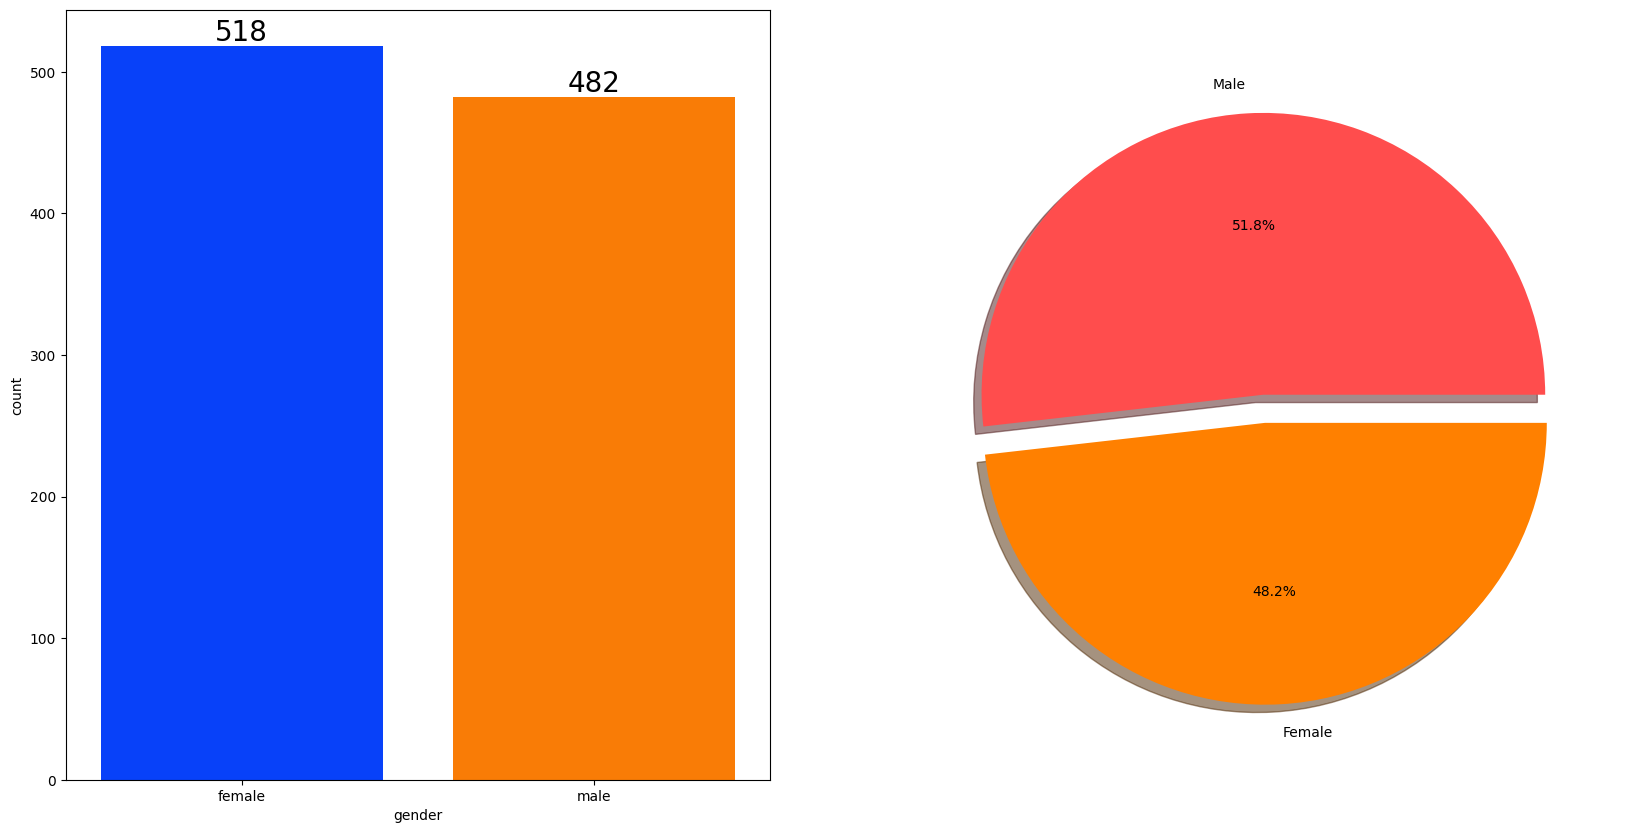

In [60]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
ax[1].pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Insights
Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [65]:
gender_group = df.groupby('gender')[df.select_dtypes(include='number').columns].mean()
gender_group

,math_score,reading_score,writing_score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


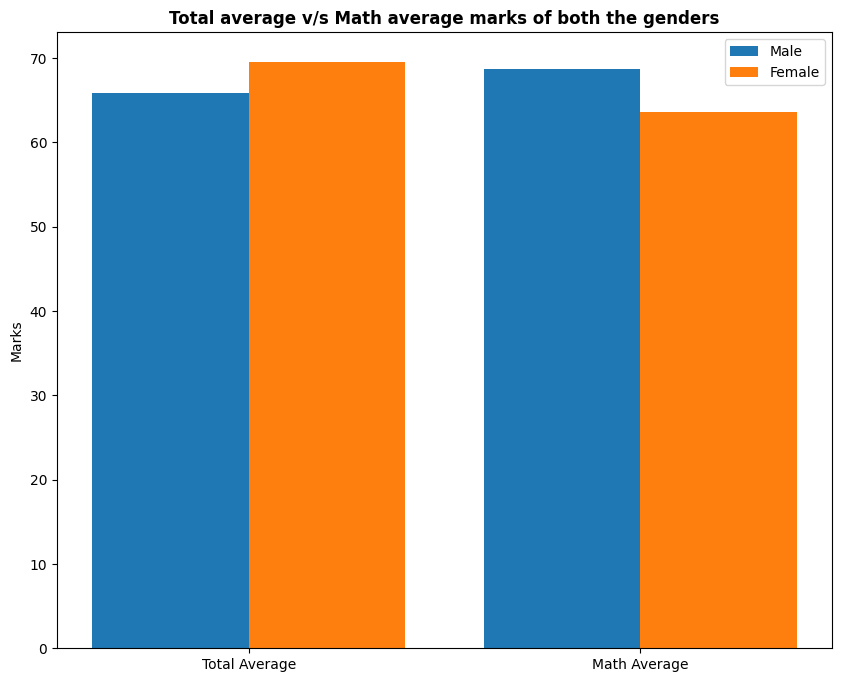

In [67]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

Insights
On an average females have a better overall score than men.
whereas males have scored higher in Maths.

RACE/EHNICITY COLUMN

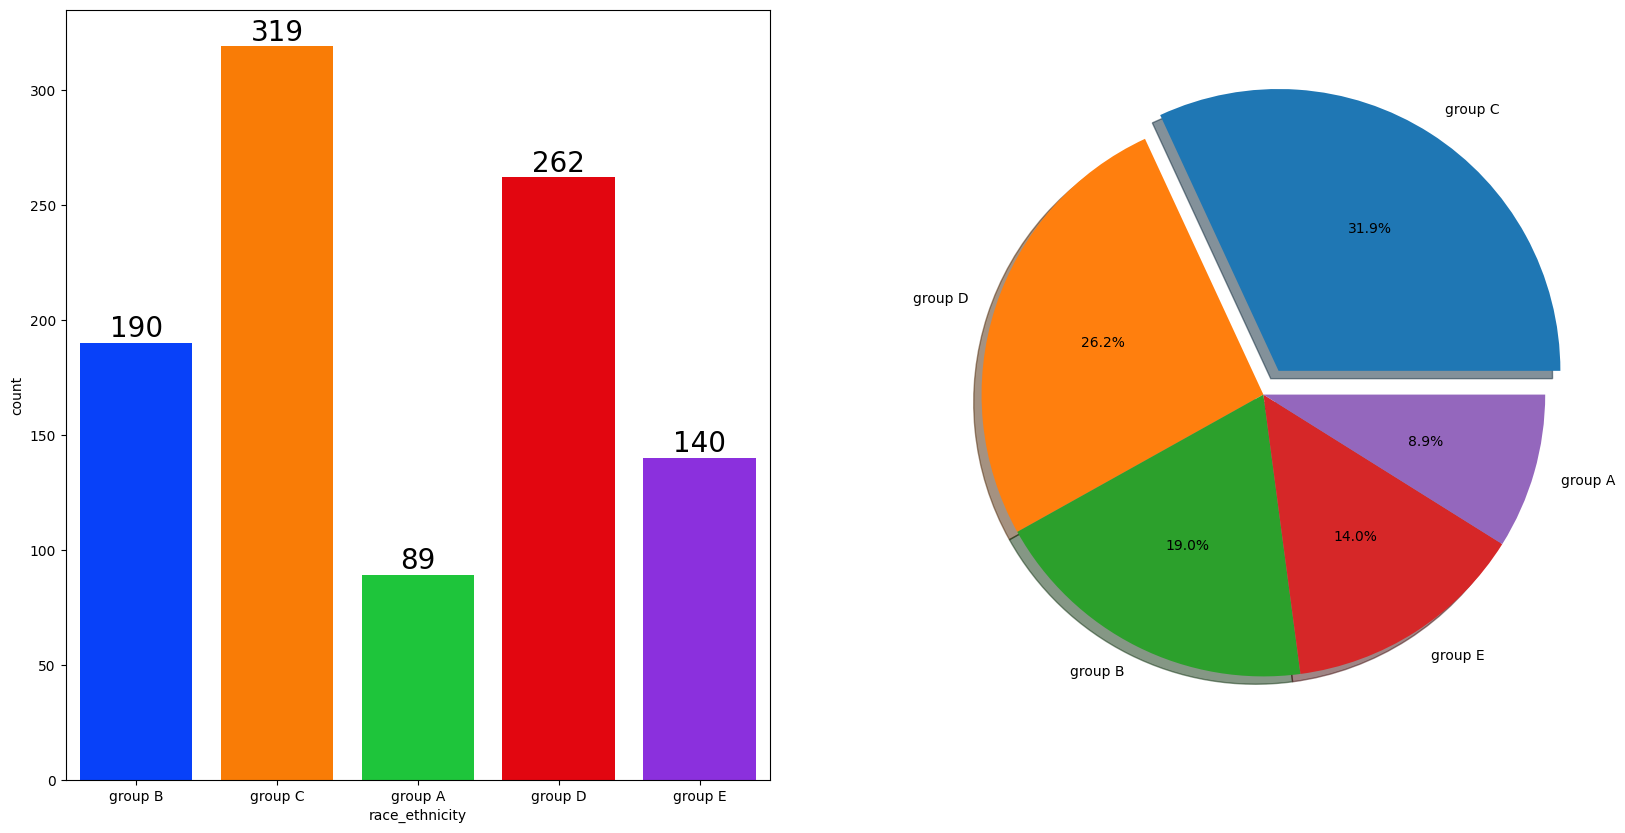

In [77]:
fig,ax= plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x=df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow= True)
plt.show()

Insights
Most of the student belonging from group C /group D.
Lowest number of students belong to groupA.

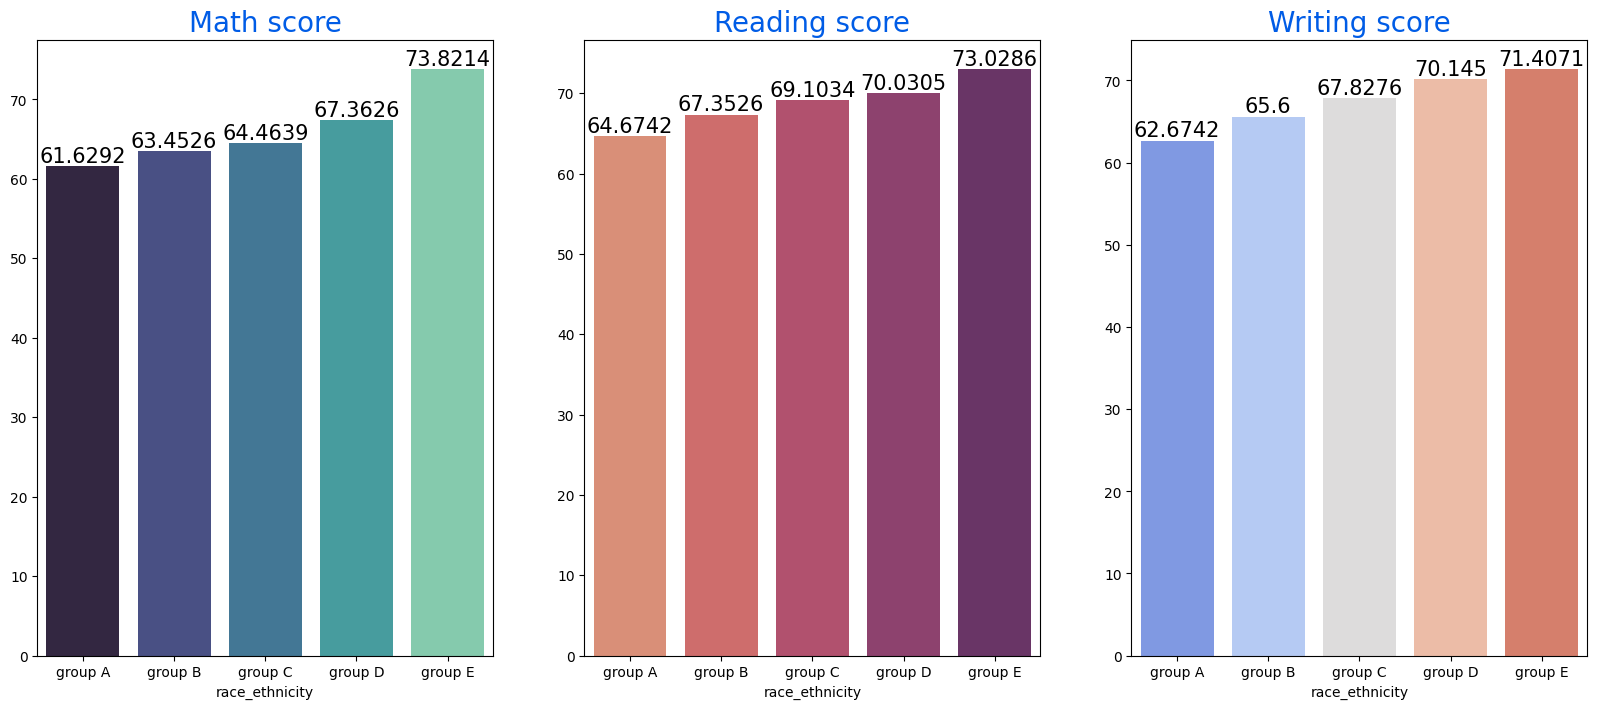

In [83]:
Group_data2= df.groupby('race_ethnicity')
fig,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette='mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)
sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)


Insights
Group E students have scored the highest marks.
Group A students have scored the lowest marks.
Students from a lower Socioeconomic status have a lower avg in all course subjects

PARENTAL LEVEL OF EDUCATION COLUMN
What is educational background of student's parent ?
Is parental education has any impact on student's performance ?

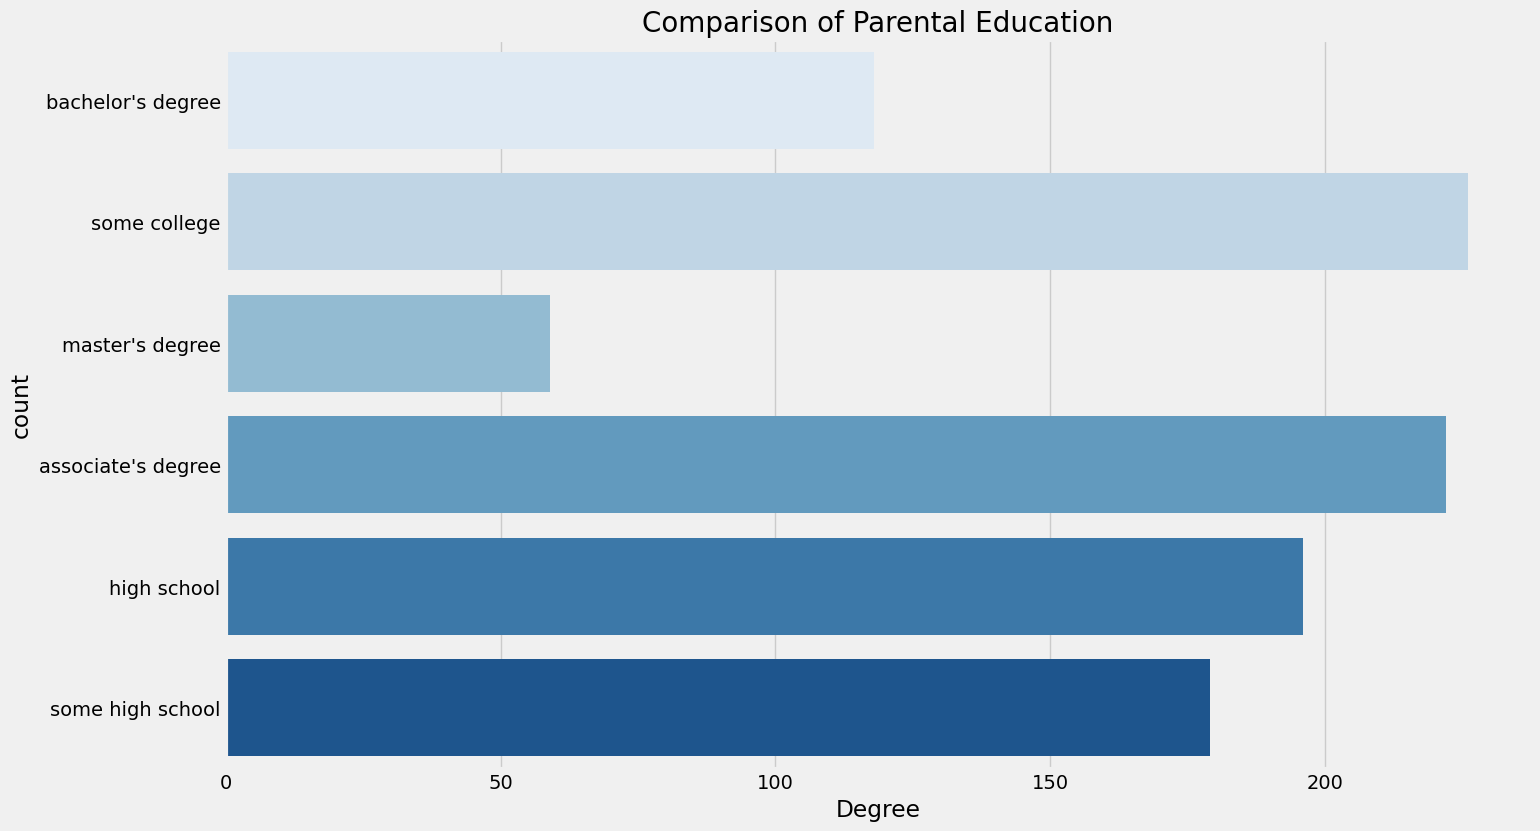

In [85]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

Largest number of parents are from some college.


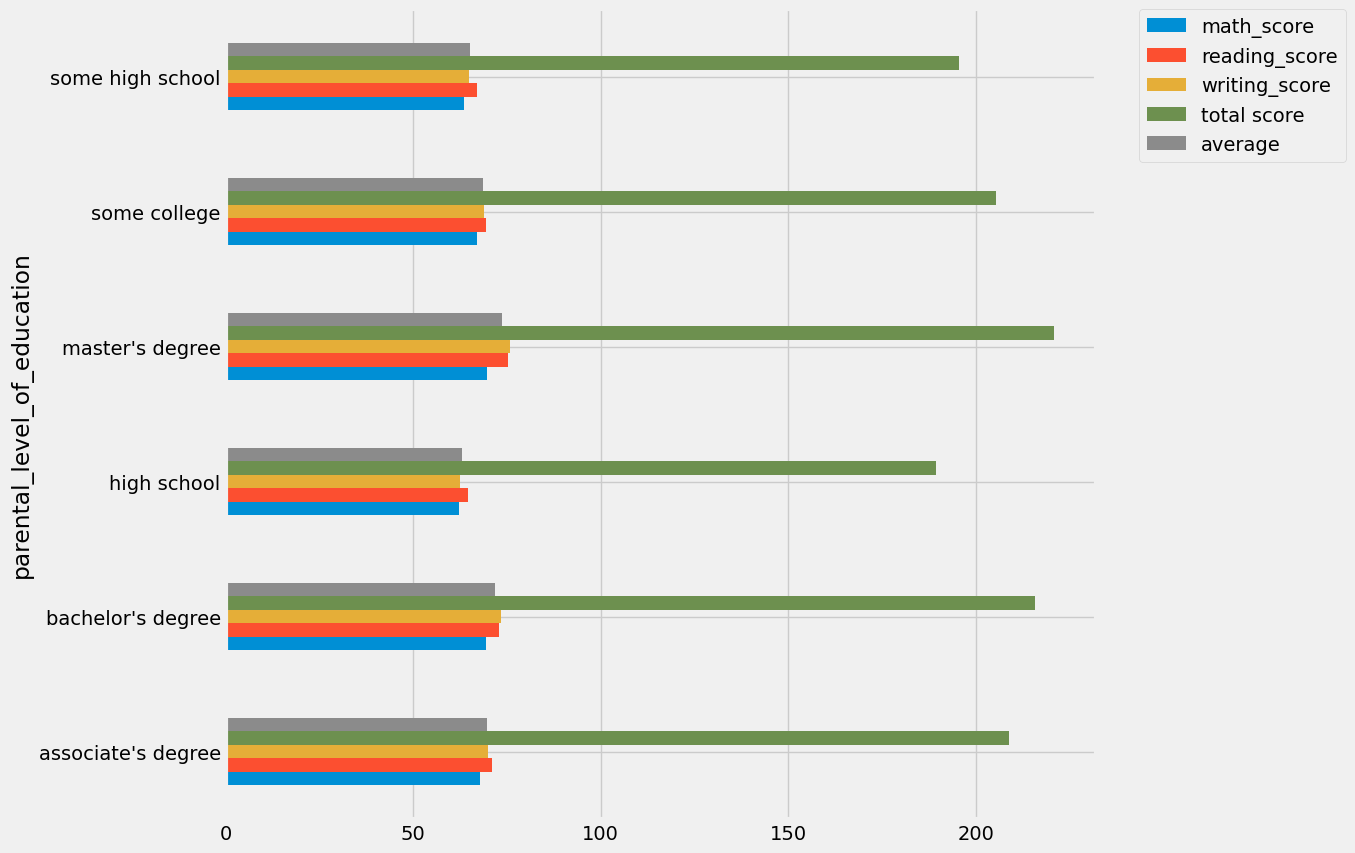

In [92]:
df_numeric = df.select_dtypes(include='number')

df.groupby('parental_level_of_education')[df_numeric.columns].mean().plot(kind='barh', figsize=(10, 10))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


Insights
The score of student whose parents possess master and bachelor level education are higher than others.

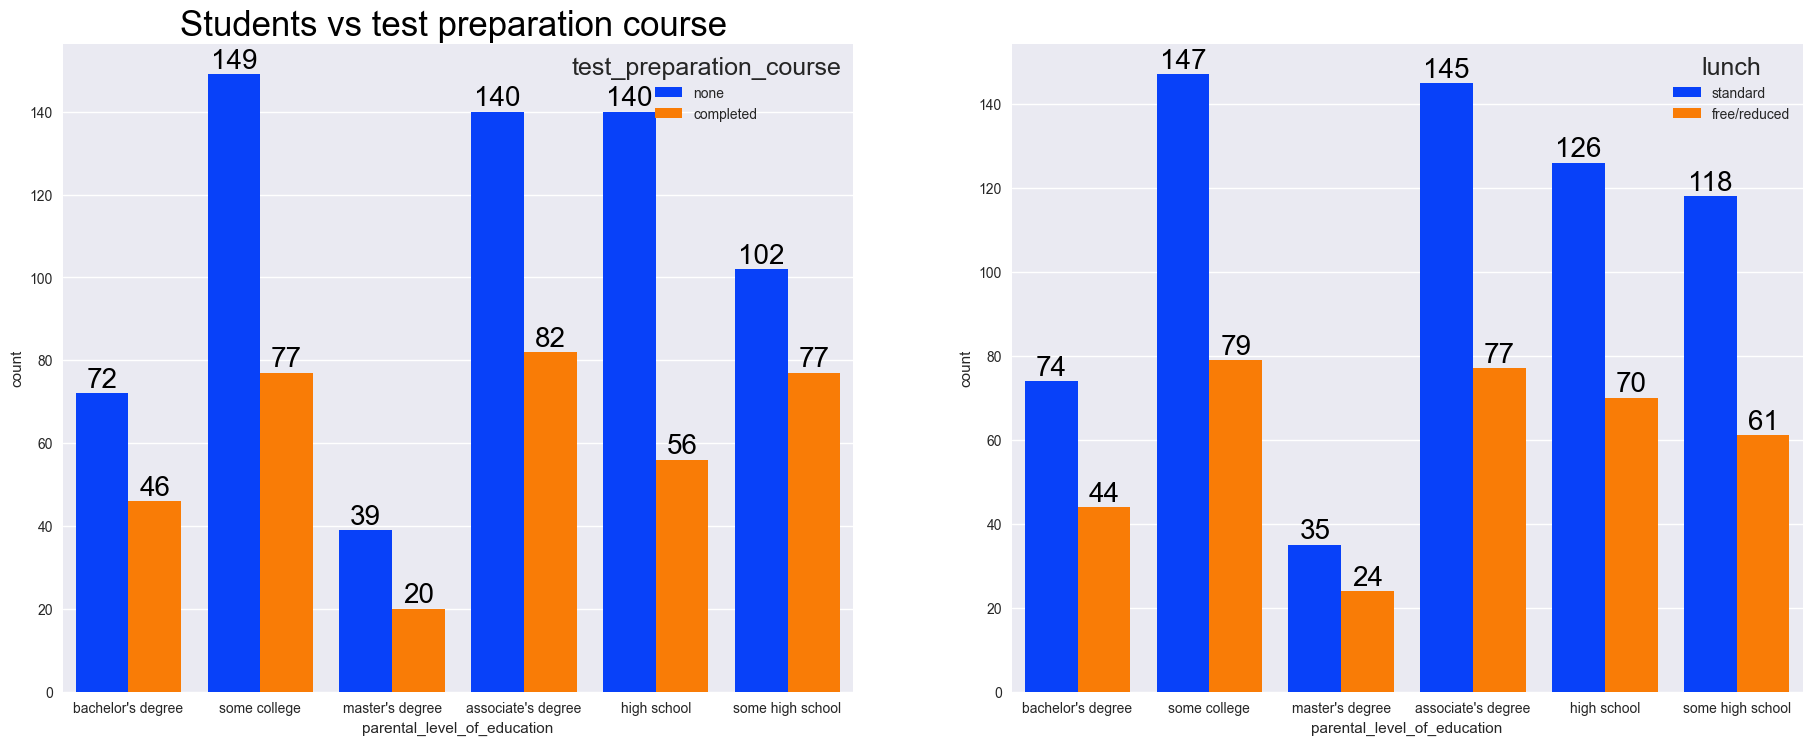

In [101]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

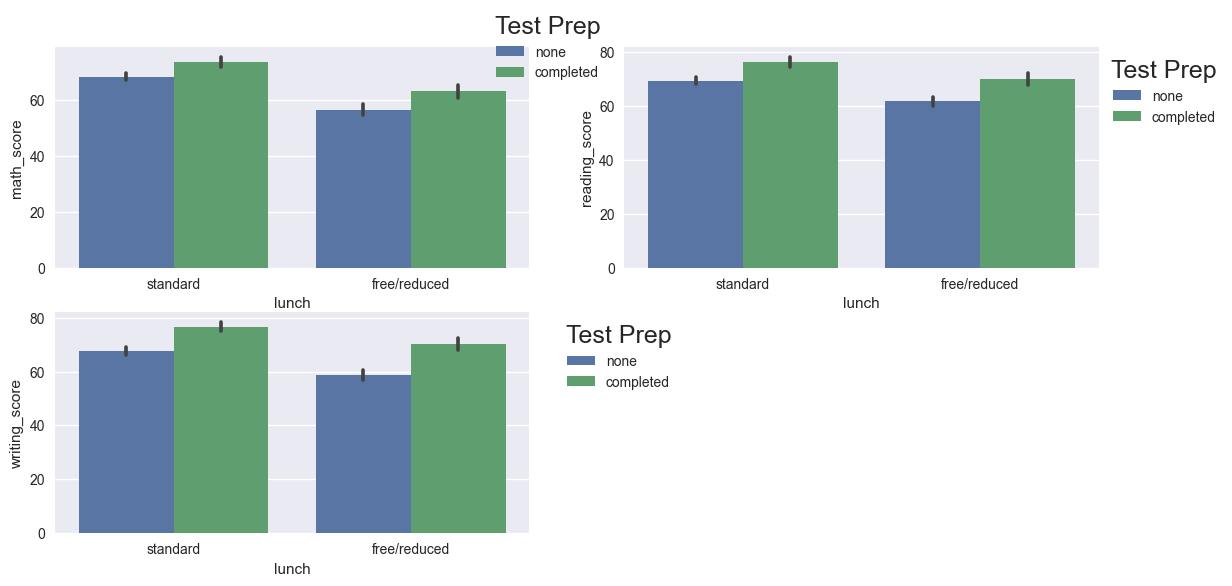

In [109]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
ax1= sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
ax1.legend(title='Test Prep', bbox_to_anchor=(0.9,1.2), loc='upper left')

plt.subplot(2,2,2)
ax2= sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
ax2.legend(title='Test Prep', bbox_to_anchor=(1, 1), loc='upper left')

plt.subplot(2,2,3)
ax3= sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])
ax3.legend(title='Test Prep', bbox_to_anchor=(1.05, 1), loc='upper left')


Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

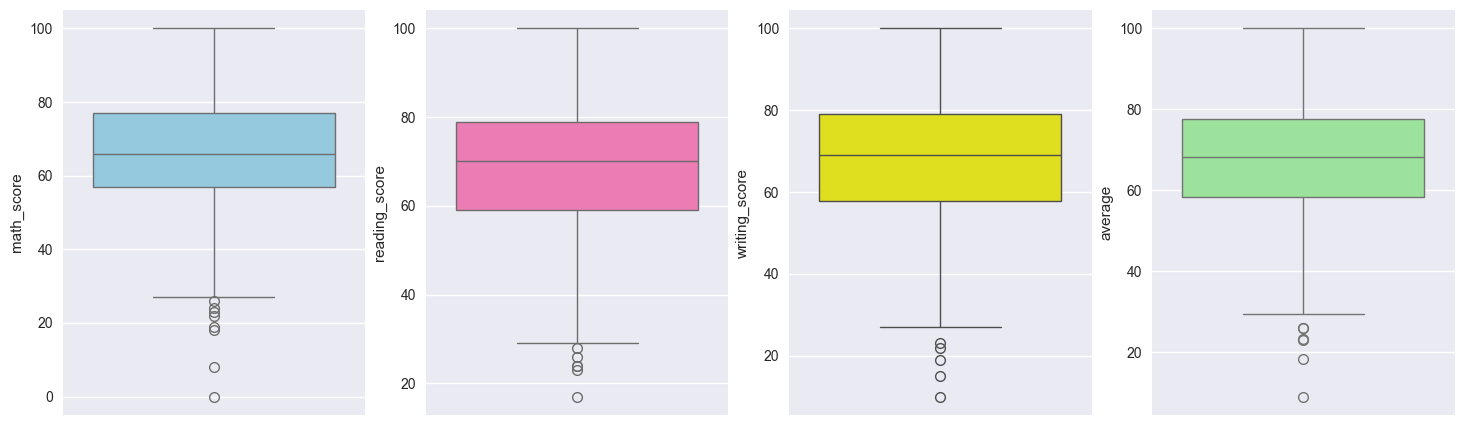

In [111]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()


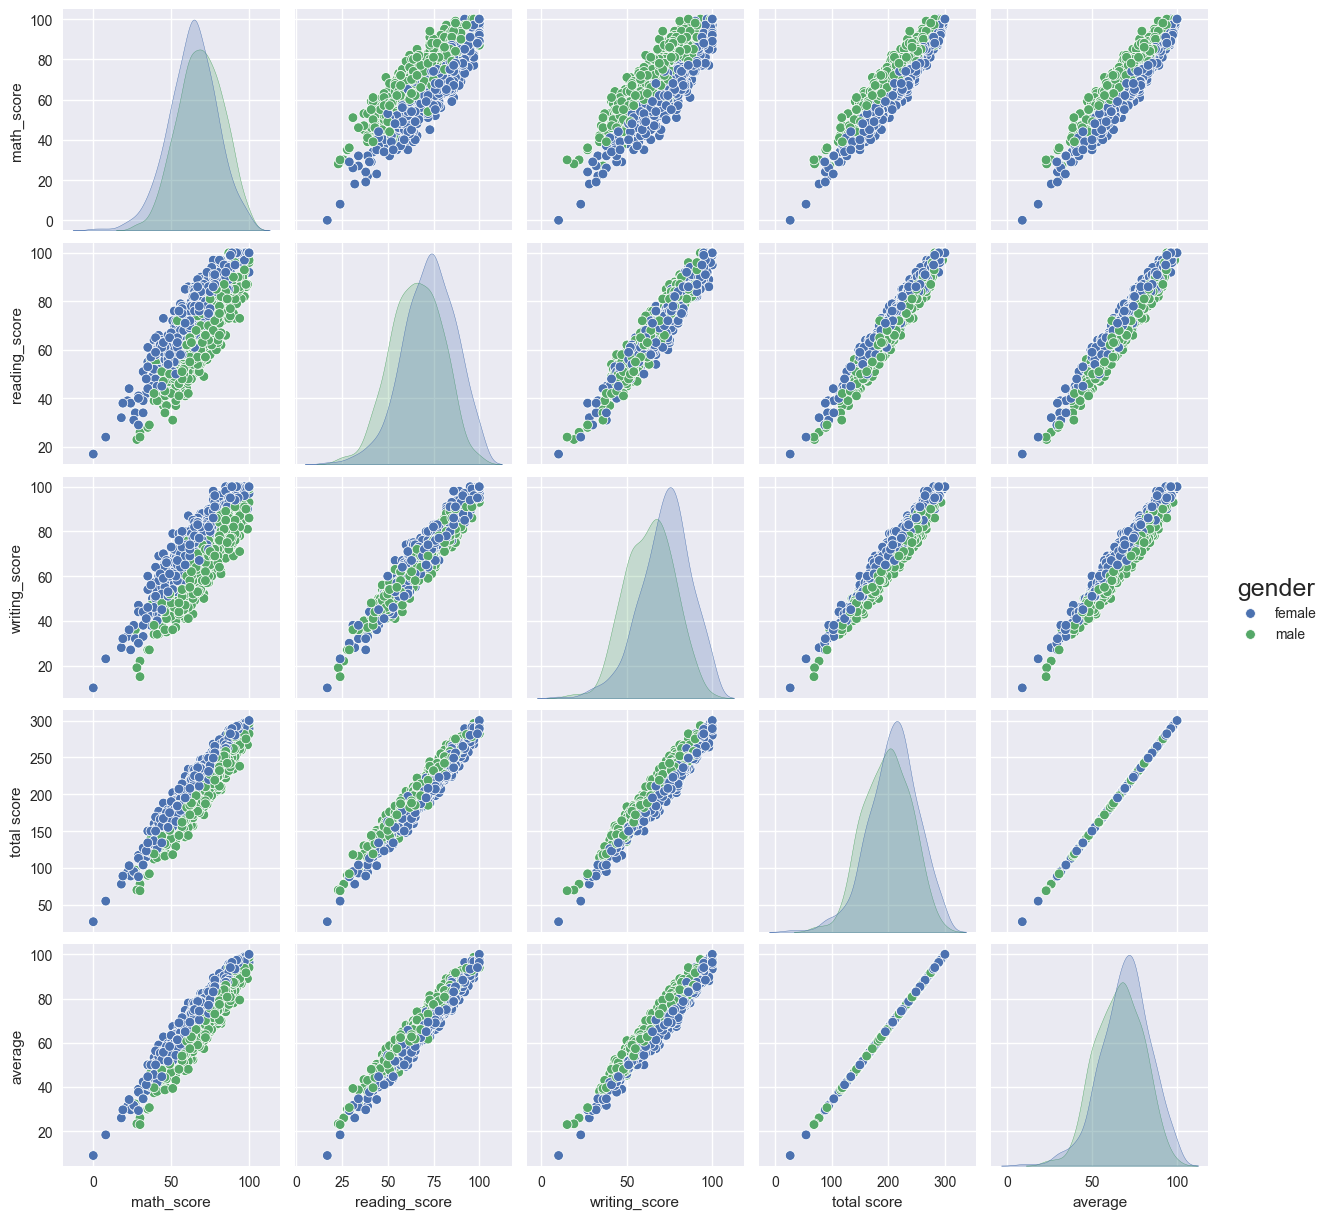

In [112]:
sns.pairplot(df,hue = 'gender')
plt.show()

From the above plot it is clear that all the scores increase linearly with each other.


Conclusions
Student's Performance is related with lunch, race, parental level education
Females lead in pass percentage and also are top-scorers
Student's Performance is not much related with test preparation course
Finishing preparation course is benefitial.